In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# taking data sets x_train and y_train
df = pd.read_csv('salary_experience.csv')
# years of experience
exp = df.iloc[:,:1].values

# actual salary
sal = df.iloc[:,1].values

# take values for bas and weight
b = 3000
w = 3500


In [20]:
# function for prediction
def prediction(exp,teta1,teta2):
    m = len(exp)
    prd = np.zeros(m)
    for i in range(m):
        prd[i] = teta1 + teta2*exp[i]
    return prd


In [21]:
prd = prediction(exp,b,w)
prd

C:\Users\BM LAPTOP\AppData\Local\Temp\ipykernel_8980\800952682.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prd[i] = teta1 + teta2*exp[i]


array([24000., 69500., 52000., 38000., 27500., 73000., 24000., 66000.,
       38000., 38000., 73000., 13500., 27500., 10000., 73000.,  6500.,
       41500., 20500.,  6500., 73000.,  3000., 41500., 41500., 59000.,
       34500., 55500., 52000., 52000., 66000., 41500., 69500., 10000.,
       17000., 66000., 24000., 73000., 31000., 24000., 62500., 13500.,
       48500., 62500., 31000., 73000.,  6500., 69500., 52000., 24000.,
       41500., 27500.])

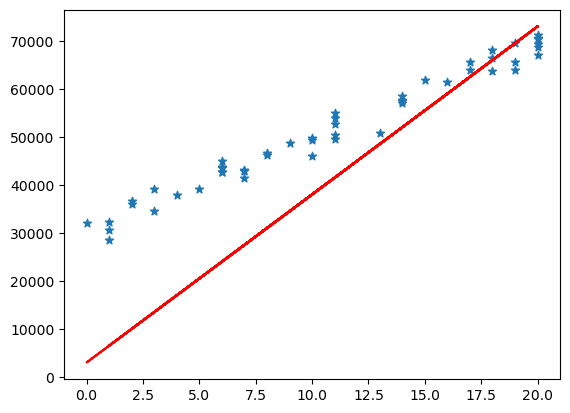

In [22]:
plt.scatter(exp,sal,marker="*")
plt.plot(exp,prd,c="r")

In [23]:
# cost function
def cost_function(prd,sal):
    m =len(sal)
    fun = 0
    for i in range(m):
        fun = fun + (prd[i]-sal[i])**2
    return (1/(2*m))*fun

In [24]:
# cost = cost_function(prd,sal)
# cost

In [25]:
# function cumpute gradient
def gradient(exp,prd,sal):
    m = len(sal)
    g_b = 0
    g_w = 0
    for i in range(m):
        g_b = g_b + (prd[i]-sal[i])
        g_w = g_w + ((prd[i]-sal[i])*exp[i])
    return g_b/m,g_w/m

In [26]:
# function for calculate gradient descent
def gradient_descent(exp,sal,teta1,teta2,itr,alpha):
    teta_hist = []
    cost_hist = []
    for i in range(itr):
        predict = prediction(exp,teta1,teta2)
        der_b,der_w = gradient(exp,predict,sal)
        teta1 = teta1 - (alpha*der_b)
        teta2 = teta2 - (alpha*der_w)
        teta_hist.append([teta1,teta2])
        cost_hist.append(cost_function(predict,sal))
        if i%1000==0:
            print(f"b: {teta1},w: {teta2}")
    return cost_hist,predict


In [27]:
itr = 100000
alpha = 0.0001
cost,predict = gradient_descent(exp,sal,b,w,itr,alpha)


C:\Users\BM LAPTOP\AppData\Local\Temp\ipykernel_8980\800952682.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prd[i] = teta1 + teta2*exp[i]


b: 3001.042616,w: [3505.297482]
b: 3690.345400321244,w: [3787.42596666]
b: 4340.88133480645,w: [3742.67240365]
b: 4975.608667688399,w: [3699.00636122]
b: 5594.9115640988775,w: [3656.4014423]
b: 6199.164851508082,w: [3614.83186066]
b: 6788.734248746689,w: [3574.27245667]
b: 7363.976587353758,w: [3534.69868213]
b: 7925.2400275458795,w: [3496.08658537]
b: 8472.86426893794,w: [3458.41279677]
b: 9007.180756143254,w: [3421.6545146]
b: 9528.512879377493,w: [3385.78949125]
b: 10037.176170187475,w: [3350.79601974]
b: 10533.47849242398,w: [3316.65292059]
b: 11017.720228573495,w: [3283.339529]
b: 11490.194461561945,w: [3250.83568233]
b: 11951.187152140667,w: [3219.12170793]
b: 12400.977311961216,w: [3188.1784112]
b: 12839.837172444992,w: [3157.98706399]
b: 13268.032349548588,w: [3128.52939326]
b: 13685.822004525666,w: [3099.78757003]
b: 14093.459000781742,w: [3071.74419857]
b: 14491.190056917627,w: [3044.38230587]
b: 14879.25589605354,w: [3017.68533141]
b: 15257.8913915247,w: [2991.63711708]
b: 1

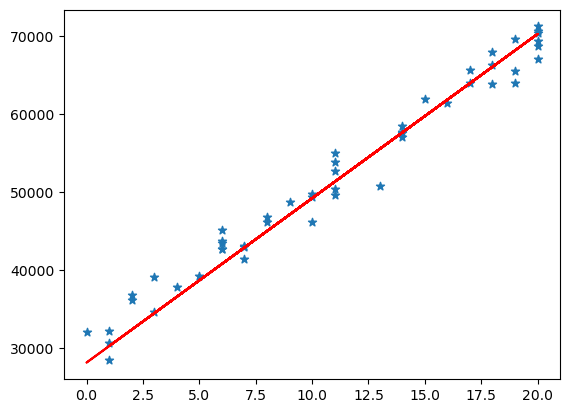

In [28]:
plt.scatter(exp,sal,marker="*")
plt.plot(exp,predict,c="r")

In [29]:
cost

[103791149.98,
 103501946.31290495,
 103221795.63175642,
 102950410.0063116,
 102687510.66417652,
 102432827.6995342,
 102186099.79113562,
 101947073.929261,
 101715505.15136486,
 101491156.28612934,
 101273797.70565802,
 101063207.0855515,
 100859169.17261374,
 100661475.55994682,
 100469924.46919931,
 100284320.53973962,
 100104474.6245357,
 99930203.59252645,
 99761330.13727902,
 99597682.59173173,
 99439094.74882971,
 99285405.6878649,
 99136459.60633942,
 98992105.65717715,
 98852197.7911123,
 98716594.60409175,
 98585159.18952957,
 98457758.99526235,
 98334265.68505284,
 98214555.00449923,
 98098506.65120901,
 97986004.1491026,
 97876934.72671364,
 97771189.19936173,
 97668661.85507128,
 97569250.34411947,
 97472855.57209732,
 97379381.59637176,
 97288735.5258407,
 97200827.42387697,
 97115570.21435882,
 97032879.59068923,
 96952673.92770882,
 96874874.19641086,
 96799403.8813686,
 96726188.90078859,
 96655157.5291073,
 96586240.32204916,
 96519370.04406855,
 96454481.59809938,
 